In [3]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

1. TAREA: Crea una imagen, p.e. de 800x800 píxeles, con la textura del tablero de ajedrez

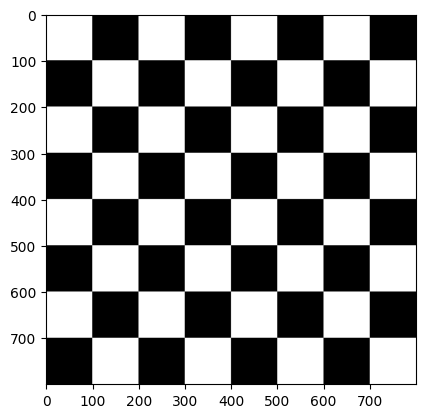

In [4]:
# Dimensiones de la imagen que se va a generar
ancho_img = 800
alto_img = 800

# Crear una imagen de un solo canal (escala de grises), donde 0 es negro y 255 es blanco
img_grises = np.zeros((alto_img, ancho_img, 1), dtype=np.uint8)

# Número de filas y columnas para el patrón
num_filas = 8
num_columnas = 8
tam_bloque = 100

# Rellenar bloques alternos en la imagen
for fila in range(num_filas):
    for columna in range(num_columnas):
        if (fila + columna) % 2 == 0:
            img_grises[fila * tam_bloque: (fila + 1) * tam_bloque, columna * tam_bloque: (columna + 1) * tam_bloque] = 255

# Mostrar la imagen usando matplotlib
# Especificar que el mapa de colores es en escala de grises
plt.imshow(img_grises, cmap='gray')
plt.show()


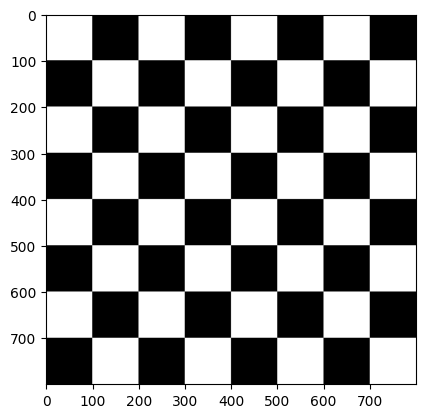

In [5]:
tamaño_cuadro = 100
tablero = np.kron([[255, 0] * 4, [0, 255] * 4] * 4, np.ones((tamaño_cuadro, tamaño_cuadro)))

plt.imshow(tablero, cmap='gray')
plt.show()

2. TAREA: Crear una imagen estilo Mondrian

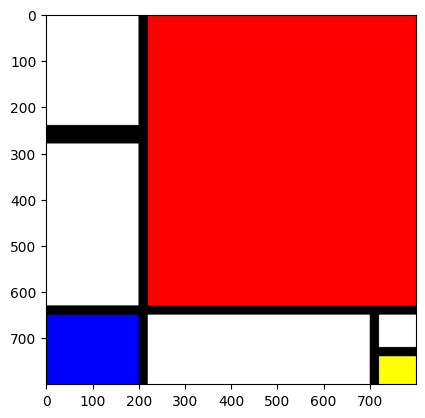

In [53]:
ancho_img = 800
alto_img = 800
#Crea una imagen con tres planos
color_img = np.zeros((alto_img,ancho_img,3), dtype = np.uint8)

# Figuras
color_img[0:630,220:800]    = [255,0,0]
color_img[650:800,220:700]    = [255,255,255]
color_img[650:720,720:800]    = [255,255,255]
color_img[740:800,720:800]    = [255,255,0]

color_img[0:240,0:200]    = [255,255,255]
color_img[280:630,0:200]    = [255,255,255]
color_img[650:800,0:200]    = [0,0,255] 

#Visualiza con matplotlib (sin especificar el mapa de color gris)
plt.imshow(color_img) 
plt.show()


3. TAREA: Resuelve una de las tareas previas (a elegir) con las funciones de dibujo de OpenCV  :)

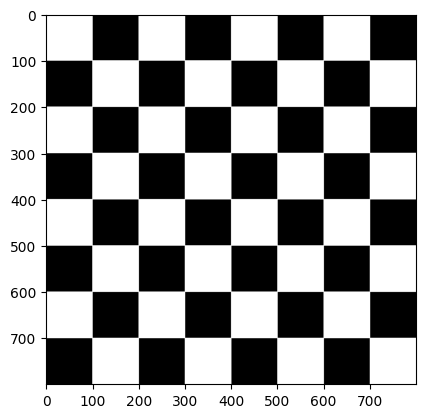

In [55]:
# Definir el tamaño del tablero y del cuadro
tamaño_tablero = 8  # 8x8 tablero de ajedrez
tamaño_cuadro = 100

# Crear una imagen en blanco y negro para el tablero
tablero = np.zeros((tamaño_tablero * tamaño_cuadro, tamaño_tablero * tamaño_cuadro), dtype=np.uint8)

# Dibujar el tablero usando bucles
for fila in range(tamaño_tablero):
    for columna in range(tamaño_tablero):
        # Alternar colores para las celdas del tablero
        if (fila + columna) % 2 == 0:
            cv2.rectangle(tablero, (columna * tamaño_cuadro, fila * tamaño_cuadro),
                          ((columna + 1) * tamaño_cuadro, (fila + 1) * tamaño_cuadro), 255, -1)

# Mostrar la imagen usando matplotlib
plt.imshow(tablero, cmap='gray')
plt.show()


4. TAREA: Modifica de forma libre los valores de un plano de la imagen

In [ ]:
# Iniciar la captura de video
vid = cv2.VideoCapture(0)

while True:
    # Leer fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        # Separar los canales
        b = frame[:, :, 0]
        g = frame[:, :, 1]
        r = frame[:, :, 2]

        # Modificación: invertir los colores del plano rojo
        r_modified = 255 - r

        # Dimensiones de la imagen de entrada
        h, w, c = frame.shape

        # Concatenar los tres planos del fotograma
        collage = np.hstack((r_modified, g, b))
    
        # Mostrar el fotograma redimensionado a la mitad para que quepa en pantalla
        cv2.imshow('RGB', cv2.resize(collage, (int(w * 1.5), int(h / 2)), cv2.INTER_NEAREST))
    
    # Detenemos pulsando ESC
    if cv2.waitKey(20) == 27:
        break

# Liberar el objeto de captura
vid.release()
# Destruir todas las ventanas
cv2.destroyAllWindows()


5. TAREA:
Pintar círculos en las posiciones del píxel más claro y oscuro de la imagen 

In [6]:
# Función que trata eventos de ratón 
def mouse_events(event, x, y, flags, params):
    global px, py, R, G, B
    px = -1
    # Movimiento del puntero     
    if event==cv2.EVENT_MOUSEMOVE:
        #Valores del píxel, desde la webcam no es BGR
        B = frame[y, x, 0]
        G = frame[y, x, 1]
        R = frame[y, x, 2]  
        # Almacena valores del evento
        px = x
        py = y

     

In [ ]:
vid = cv2.VideoCapture(0)

# Tipografía para mostrar texto
font = cv2.FONT_HERSHEY_SIMPLEX
  
lanzado = 0
px = -1
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret: 
        # Activa em manejador en el primer fotograma
        if lanzado == 0:
            # Muestra fotograma
            cv2.imshow('Cam', frame)   
            # Define el nombre del manejador del evento
            cv2.setMouseCallback('Cam', mouse_events)
            lanzado = 1

        # Encuentra los píxeles más claros y oscuros en la imagen
        
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        #  Convierte el fotograma actual (frame) de una imagen en color (BGR) a una imagen en escala de grises.
        #  Esto es necesario para calcular los valores más claros y oscuros de la imagen en escala de grises


        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(gray_frame)
        #Basicamente se obtienen los valores más claros y oscuros del frame ademas del su posicion

        # Dibuja círculos en las posiciones de los píxeles más claros y oscuros
        cv2.circle(frame, min_loc, 10, (0, 0, 255), -1)  # Círculo rojo en el píxel más oscuro
        cv2.circle(frame, max_loc, 10, (0, 255, 0), -1)  # Círculo verde en el píxel más claro

        # Muestra valores RGB intentando centrar en el puntero
        if px > -1:
            cv2.putText(frame, '{}'.format(R), (px-45,py-5), font, 0.5, (0, 0, 255), 1)
            cv2.putText(frame, '     {}'.format(G), (px-54,py-5), font, 0.5, (0, 255, 0), 1)
            cv2.putText(frame, '         {}'.format(B), (px-54,py-5), font, 0.5, (255, 0, 0), 1)
            
        cv2.imshow('Cam', frame)   
        
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

¿Si quisieras hacerlo sobre la zona 8x8 más clara/oscura?

In [ ]:
# Iniciar la captura de video
vid = cv2.VideoCapture(0)

# Tipografía para mostrar texto
font = cv2.FONT_HERSHEY_SIMPLEX

zona_size = 8  # Tamaño de la zona 8x8

while True:
    # Leer fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        # Convertir el fotograma a escala de grises
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Variables para guardar la posición de la zona más clara y más oscura
        max_avg = 0
        min_avg = 255
        max_pos = (0, 0)
        min_pos = (0, 0)

        # Recorrer la imagen en bloques de 8x8 para encontrar las zonas más clara y más oscura
        h, w = gray_frame.shape
        for i in range(0, h - zona_size + 1, zona_size):
            for j in range(0, w - zona_size + 1, zona_size):
                # Calcular el promedio de la región 8x8
                region_avg = np.mean(gray_frame[i:i + zona_size, j:j + zona_size])

                # Comparar con los promedios actuales más claro y más oscuro
                if region_avg > max_avg:
                    max_avg = region_avg
                    max_pos = (j + zona_size // 2, i + zona_size // 2)  # Centro de la región

                if region_avg < min_avg:
                    min_avg = region_avg
                    min_pos = (j + zona_size // 2, i + zona_size // 2)  # Centro de la región

        # Dibujar círculos en el centro de las zonas más clara y más oscura
        cv2.circle(frame, min_pos, 10, (0, 0, 255), -1)  # Círculo rojo en la zona más oscura
        cv2.circle(frame, max_pos, 10, (0, 255, 0), -1)  # Círculo verde en la zona más clara

        # Mostrar el fotograma con los círculos
        cv2.imshow('Cam', frame)

    # Detener pulsando ESC
    if cv2.waitKey(20) == 27:
        break

# Liberar el objeto de captura
vid.release()
# Destruir todas las ventanas
cv2.destroyAllWindows()


6. TAREA: Llevar a cabo una propuesta propia de pop art

In [ ]:
import cv2
import numpy as np

# Iniciar la captura de video
vid = cv2.VideoCapture(0)

# Función para aplicar el efecto pop art
def apply_pop_art(frame):
    # Redimensionar la imagen
    h, w, _ = frame.shape
    frame_resized = cv2.resize(frame, (w // 2, h // 2))

    # Convertir la imagen a escala de grises
    gray_frame = cv2.cvtColor(frame_resized, cv2.COLOR_BGR2GRAY)

    # Aplicar el efecto de contorno
    edges = cv2.Canny(gray_frame, 100, 200)

    # Crear una imagen en color a partir de los bordes
    edges_colored = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

    # Aplicar diferentes esquemas de color al fotograma
    pop_art_frames = []
    colors = [
        (255, 105, 180),  # Hot Pink
        (102, 205, 170),  # Medium Aquamarine
        (138, 43, 226),   # Blue Violet
        (255, 215, 0)     # Gold
    ]
    
    for color in colors:
        # Crear una máscara usando los bordes y aplicar color
        color_mask = np.zeros_like(edges_colored)
        color_mask[:, :] = color
        pop_frame = cv2.addWeighted(edges_colored, 0.5, color_mask, 0.5, 0)
        pop_art_frames.append(pop_frame)

    # Crear una cuadrícula 2x2 de las imágenes pop art
    top_row = np.hstack((pop_art_frames[0], pop_art_frames[1]))
    bottom_row = np.hstack((pop_art_frames[2], pop_art_frames[3]))
    collage = np.vstack((top_row, bottom_row))

    return collage

while True:
    # Leer fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        # Aplicar el efecto pop art
        pop_art_frame = apply_pop_art(frame)

        # Mostrar la imagen pop art
        cv2.imshow('Pop Art', pop_art_frame)

    # Detener pulsando ESC
    if cv2.waitKey(20) == 27:
        break

# Liberar el objeto de captura
vid.release()
# Destruir todas las ventanas
cv2.destroyAllWindows()
